<a href="https://colab.research.google.com/github/aulphin/M.tech-Project/blob/main/Final_basecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

A Python library is a reusable chunk of code that you may want to include in your programs/ projects.

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

# Checking if my code worked by seeing the directores
# Also Storing all the Labels in the Variable 'Labels'

In [ ]:
labels = os.listdir('/content/drive/My Drive/basecode/dataset/train')

# Printing All the labels present in the dataset

In [ ]:
labels

['yawn', 'Open', 'no_yawn', 'Closed']

# Defining a method namely 'face_for_yawn'

# This function Classifying the label 'yawn'  & 'no_yawn'

In [ ]:
def face_for_yawn(direc="/content/drive/My Drive/basecode/dataset/train", face_cas_path="/content/drive/My Drive/basecode/base/mckcf_d.xml"):
    yaw_no = []
    IMG_SIZE = 64
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# Defining a method namely 'get_data'

# This function Classifying the label 'Closed' & 'open'

In [ ]:
def get_data(dir_path="/content/drive/My Drive/basecode/dataset/train/", face_cas="/content/drive/My Drive/basecode/base/mckcf_d.xml", eye_cas="/content/drive/My Drive/basecode/base/kcf.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 64
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


# Appending data

In [ ]:

def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [ ]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 64, 64, 3)

In [ ]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
y = np.array(y)

In [ ]:
seed = 42
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

494

In [ ]:
len(X_train)

1150

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Creating the Model

In [ ]:
#using Sequential Model
model = Sequential()
#defining First Convolutional Layer activateion used 'relu'
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
#defining maxpooling layer for first convolutional layer
model.add(MaxPooling2D(3, 3))
#defining Second Convolutional Layer activateion used 'relu'
model.add(Conv2D(128, (2, 2), activation="relu"))
#defining maxpooling layer for second convolutional layer
model.add(MaxPooling2D())
#defining Third Convolutional Layer activateion used 'relu'
model.add(Conv2D(32, (3, 3), activation="relu"))
#defining maxpooling layer for Third convolutional layer
model.add(MaxPooling2D(2, 2))
#defining flatten layer
model.add(Flatten())
#defiing Dropout layer
model.add(Dropout(0.5))
#defiing Dense layer activateion used 'relu'
model.add(Dense(64, activation="relu"))
#defiing output layer activateion used 'softmax'
model.add(Dense(4, activation="softmax"))

# Compiling Model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

# Training The model

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/100
36/36 [==============================] - 8s 48ms/step - loss: 1.2987 - accuracy: 0.4282 - val_loss: 0.9487 - val_accuracy: 0.6538
Epoch 2/100
36/36 [==============================] - 1s 35ms/step - loss: 0.9091 - accuracy: 0.6587 - val_loss: 0.5555 - val_accuracy: 0.7753
Epoch 3/100
36/36 [==============================] - 1s 36ms/step - loss: 0.5867 - accuracy: 0.7577 - val_loss: 0.4797 - val_accuracy: 0.7976
Epoch 4/100
36/36 [==============================] - 1s 39ms/step - loss: 0.4447 - accuracy: 0.8246 - val_loss: 0.4068 - val_accuracy: 0.8441
Epoch 5/100
36/36 [==============================] - 1s 36ms/step - loss: 0.4540 - accuracy: 0.7964 - val_loss: 0.3979 - val_accuracy: 0.8441
Epoch 6/100
36/36 [==============================] - 1s 37ms/step - loss: 0.4000 - accuracy: 0.8145 - val_loss: 0.2885 - val_accuracy: 0.8785
Epoch 7/100
36/36 [==============================] - 1s 36ms/step - loss: 0.3486 - accuracy: 0.8513 - val_loss: 0.2822 - val_accuracy: 0.8806
Epoch 

# Plotting accuracy, validation accuracy, loss, validation loss

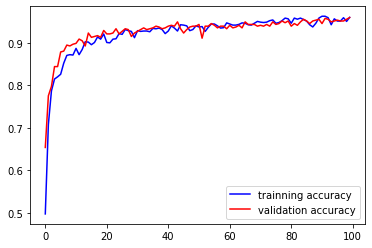

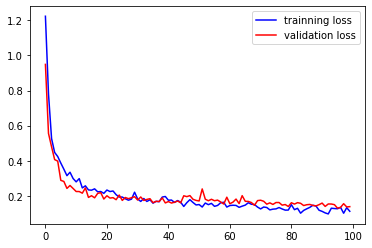

In [ ]:
# getting accuracy
accuracy = history.history['accuracy']
# getting validation accuracy
val_accuracy = history.history['val_accuracy']
# getting loss
loss = history.history['loss']
# getting validation loss
val_loss = history.history['val_loss']
#defining epochs
epochs = range(len(accuracy))

# plotting training accuracy
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
# plotting validation accuracy
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()
# plotting training loss
plt.plot(epochs, loss, "b", label="trainning loss")
# plotting validation loss
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Saving Model for later Use

In [ ]:
model.save("/content/drive/My Drive/drowiness_new6.h5")

In [ ]:
model.save("/content/drive/My Drive/drowiness_new6.model")

INFO:tensorflow:Assets written to: /content/drive/My Drive/drowiness_new6.model/assets


In [ ]:
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prediction

array([3, 3, 3, 3, 2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 0, 2, 2, 2, 3, 2, 3, 3,
       3, 0, 3, 3, 2, 2, 3, 0, 3, 0, 2, 1, 0, 3, 3, 1, 0, 3, 1, 2, 2, 0,
       1, 0, 2, 2, 1, 1, 1, 3, 2, 3, 3, 2, 0, 2, 0, 2, 3, 0, 2, 0, 1, 1,
       3, 0, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 3, 1, 3, 3, 2,
       3, 0, 3, 3, 3, 1, 0, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 0, 3,
       0, 2, 1, 2, 1, 3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 0, 2, 3, 3, 1, 3, 0,
       2, 2, 1, 2, 3, 2, 2, 3, 3, 0, 0, 2, 2, 2, 3, 3, 1, 3, 0, 0, 3, 1,
       0, 1, 3, 3, 1, 3, 0, 2, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 0, 1, 3,
       0, 2, 3, 3, 2, 3, 3, 2, 2, 3, 0, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 1,
       1, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 2, 3, 0, 3,
       3, 3, 1, 2, 2, 3, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 2, 3, 3,
       1, 3, 3, 3, 0, 0, 1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2, 3, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 1, 3, 0, 2, 0, 3, 2, 2, 2,
       0, 3, 2, 1, 0, 3, 0, 2, 2, 2, 3, 3, 3, 3, 3,

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.68      0.75      0.71        53
     no_yawn       0.77      0.91      0.83        66
      Closed       1.00      0.78      0.88       181
        Open       0.89      0.99      0.94       194

    accuracy                           0.88       494
   macro avg       0.84      0.86      0.84       494
weighted avg       0.89      0.88      0.88       494



# Loading our Model to see the working

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/basecode/drowiness_new6.h5")

# Defining new labels and method name 'prepare'

In [ ]:
#defining new labels
labels_new = ["no_yawn", "yawn", "Closed", "Open"]
#defining image size
IMG_SIZE = 145
def prepare(filepath, face_cas="/content/drive/My Drive/basecode/base/mckcf_d.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Testing the Model and predicting

Closed 2


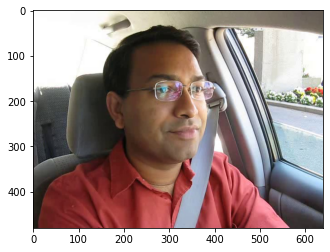

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/113.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


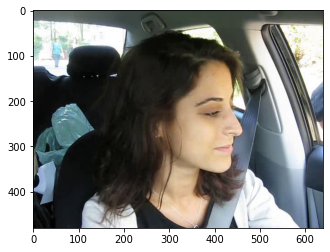

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/1134.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

yawn 1


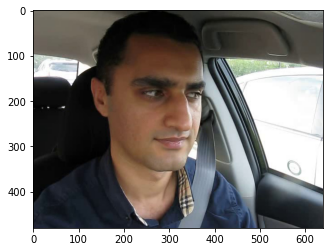

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/461.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


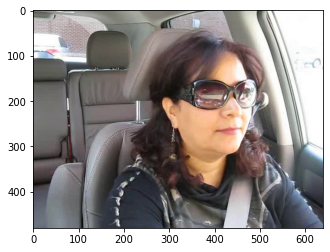

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/1570.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

yawn 1


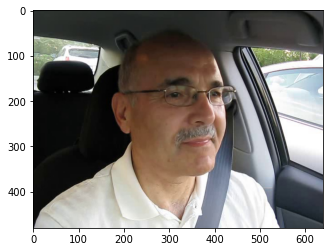

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/830.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


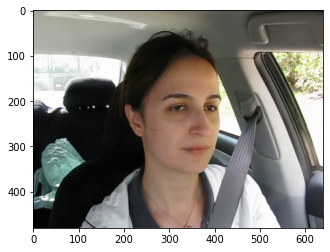

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/1323.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


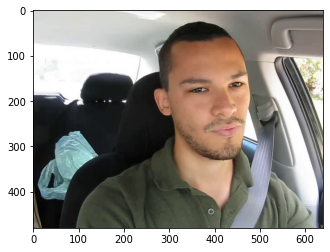

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/1950.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


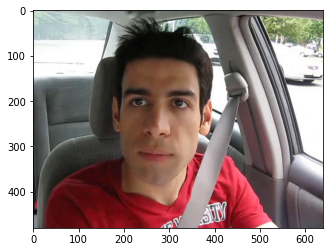

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/2110.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

no_yawn 0


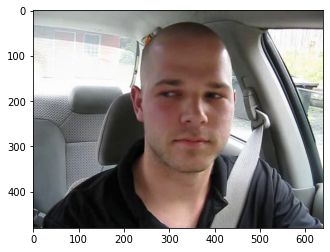

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/no_yawn/2289.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Open 3


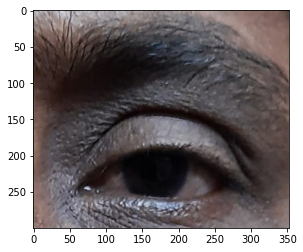

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Open/_586.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Open 3


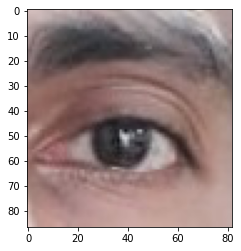

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Open/_330.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Open 3


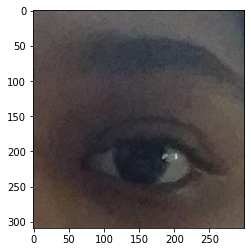

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Open/_634.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Open 3


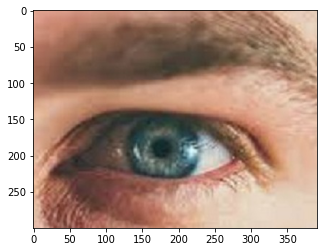

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Open/_441.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Open 3


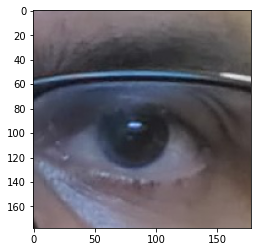

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Open/_497.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Closed 2


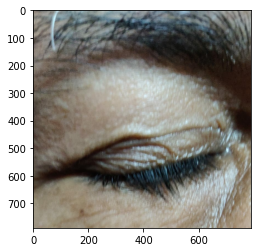

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Closed/_586.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Closed 2


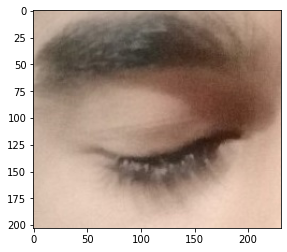

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Closed/_302.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))

Closed 2


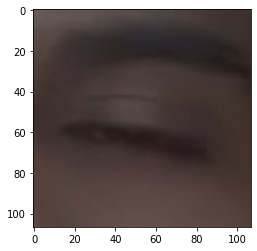

In [ ]:
#taking file path
file = "/content/drive/My Drive/basecode/dataset/test/Closed/_416.jpg"
#plotting image
plt.imshow(plt.imread(file))
#predicting image
prediction = model.predict([prepare(file)])
#printing image label and index
print(labels_new[np.argmax(prediction)],np.argmax(prediction))